Lambda School Data Science

*Unit 1, Sprint 1, Module 4*

---

# ASSIGNMENT

### 1) Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

Get caught up to where we got our example in class and then try and take things further. How close to "pixel perfect" can you make the lecture graph?

Once you have something that you're proud of, share your graph in the cohort channel and move on to the second exercise.

### 2) Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

**WARNING**: There are a lot of very custom graphs and tables at the above link. I **highly** recommend not trying to reproduce any that look like a table of values or something really different from the graph types that we are already familiar with. Search through the posts until you find a graph type that you are more or less familiar with: histogram, bar chart, stacked bar chart, line chart, [seaborn relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html), etc. Recreating some of the graphics that 538 uses would be a lot easier in Adobe photoshop/illustrator than with matplotlib. 

- If you put in some time to find a graph that looks "easy" to replicate you'll probably find that it's not as easy as you thought. 

- If you start with a graph that looks hard to replicate you'll probably run up against a brick wall and be disappointed with your afternoon.












In [0]:
#import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [0]:
# use the 'magic' symbol (%) to specify some non-python code (i.e., affects the underlying jupyter kernel).
%matplotlib inline
'''
That line is only for jupyter notebooks, and allows plt figures to show up in your noteboook.
if you are using another editor, you'll use: 
 plt.show() 
at the end of all your plotting commands to have the figure pop up in another window.
'''

In [0]:
# Specify the 'plot style' we want to use with pandas and matplotlib
plt.style.use('fast') 
# "fast" is actually the default style, so you don't necessarily have to set it.

In [16]:
# List of other available plot styles you can use instead of "fast".
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

Part 1. The Pandas built-in visualization tool

This is useful only for simple, quick-and-dirty plots. Read the full documentation. For anything more complex you'll want to use a more robust visualization package such as matplotlib, seaborn, or plotly.

"Under the hood, pandas plots graphs with the matplotlib library. This is usually pretty convenient since it allows you to just .plot your graphs, but since matplotlib is kind of a train wreck pandas inherits that confusion." J. Sonoma

In [19]:
#read the titanic dataset
url = 'https://raw.githubusercontent.com/austinlasseter/pandas_visualization/master/data/titanic.csv'
df = pd.read_csv(url)
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,Southampton
1,1,1,female,38.0,71.2833,Cherbourg
2,1,3,female,26.0,7.9250,Southampton
3,1,1,female,35.0,53.1000,Southampton
4,0,3,male,35.0,8.0500,Southampton


In [21]:
# cabin class is a categorical variable
# it can be displayed using either number or string values.
df['cabin class']=df['Pclass'].map({1:'First', 2:'Second', 3:'Third'})
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,cabin class
0,0,3,male,22.0,7.2500,Southampton,Third
1,1,1,female,38.0,71.2833,Cherbourg,First
2,1,3,female,26.0,7.9250,Southampton,Third
3,1,1,female,35.0,53.1000,Southampton,First
4,0,3,male,35.0,8.0500,Southampton,Third


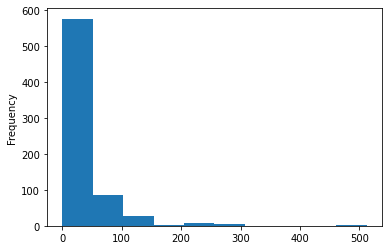

In [22]:
# Fare is a continuous variable, so we can display it with a histogram.
df['Fare'].plot(kind='hist');

In [25]:
# A continuous variable can be converted to a categorical var using binning.
farebins = [0, 8, 15, 33, 512]
farelabels=['low', 'medium', 'high', 'vhigh']
df['fare_groups'] = pd.cut(df['Fare'], bins=farebins, labels=farelabels)
my_result = df['fare_groups'].value_counts().sort_index()
my_result



low       154
medium    189
high      185
vhigh     174
Name: fare_groups, dtype: int64

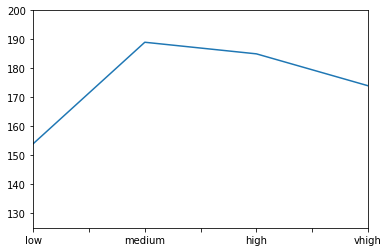

In [28]:
# sometimes it's important to specify the range of your y-axis to get more accurate results. 'lim'='limits'
my_result.plot(ylim=(125,200));

**Display a single continuous variable**

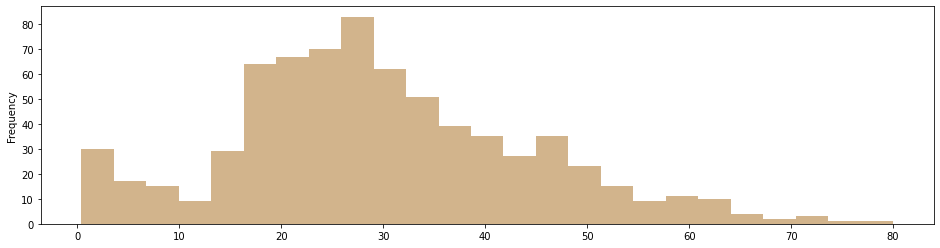

In [37]:
#histogram
df['Age'].plot(kind='hist', bins=25, figsize=(16,4), color='tan');

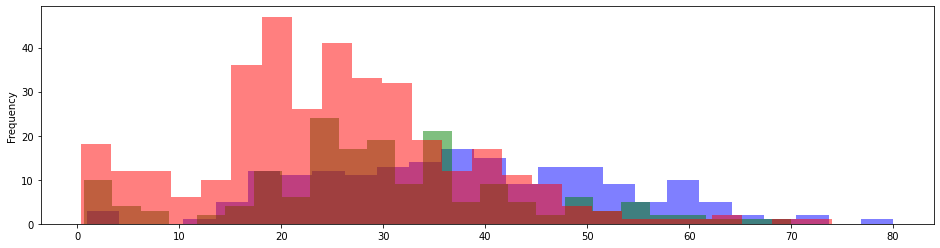

In [44]:
# Stacked Histogram of continuous variable, broken out by categorical variable
df[df['Pclass']==1]['Age'].plot(kind='hist', bins=25, figsize=(16,4),color='b', alpha=0.5);
df[df['Pclass']==2]['Age'].plot(kind='hist', bins=25, figsize=(16,4), color='g', alpha=0.5);
df[df['Pclass']==3]['Age'].plot(kind='hist', bins=25, figsize=(16,4), color='r', alpha=0.5);

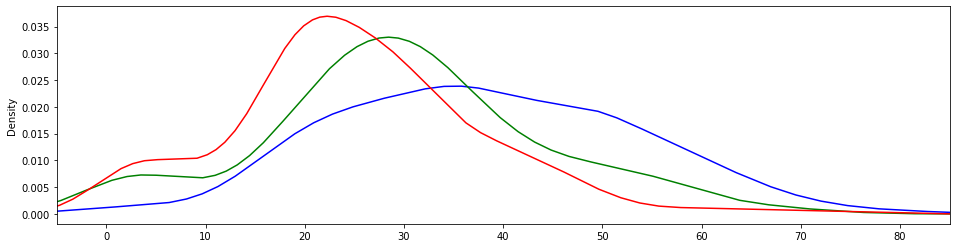

In [48]:
# But this is actually easier to read using a Kernel Density Estimate (KDE). Note the use of 'xlim'.
df[df['Pclass']==1]['Age'].plot(kind='density', xlim=(-5,85), figsize=(16,4),color='b');
df[df['Pclass']==2]['Age'].plot(kind='density', xlim=(-5,85), figsize=(16,4), color='g');
df[df['Pclass']==3]['Age'].plot(kind='density', xlim=(-5,85), figsize=(16,4), color='r');


**Display a single categorical variable**

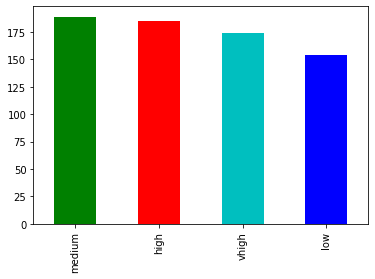

In [50]:
# Bar chart. Use colors to make a particular value 'pop'!
df['fare_groups'].value_counts().plot(kind='bar', color=['g','r','c','b']);

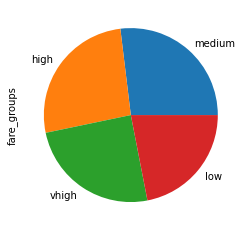

In [52]:
#pie chart
df['fare_groups'].value_counts().plot(kind='pie', figsize=(4,4));

**Compare two categorical variables**

In [56]:
# Compare two categorical variables using crosstab
cabdeath = pd.crosstab(df['cabin class'], df['Survived'])
cabdeath

Survived,0,1
cabin class,,
First,64,120
Second,90,83
Third,270,85


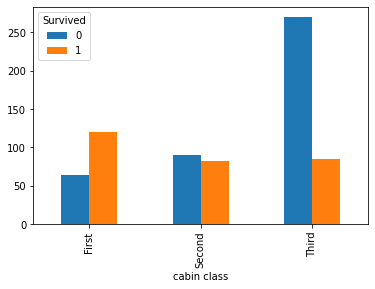

In [57]:
#make that into a bar chart
cabdeath.plot(kind='bar');

In [58]:
# Crosstab with column percents.
cabdeath2=pd.crosstab(df['cabin class'], df['Survived'], normalize='columns')
cabdeath2

Survived,0,1
cabin class,,
First,0.150943,0.416667
Second,0.212264,0.288194
Third,0.636792,0.295139


In [0]:
# make a stacked bar chart, for easy comparison of two categorical variables.


In [0]:
!wget trump-approval-ratings.zip

--2020-03-20 01:46:32--  http://trump-approval-ratings.zip/
Resolving trump-approval-ratings.zip (trump-approval-ratings.zip)... failed: Name or service not known.
wget: unable to resolve host address ‘trump-approval-ratings.zip’


In [0]:
!unzip trump-approval-ratings.zip

Archive:  trump-approval-ratings.zip
   creating: trump-approval-ratings/
  inflating: trump-approval-ratings/README.md  
  inflating: trump-approval-ratings/approval_polllist.csv  
  inflating: trump-approval-ratings/approval_topline.csv  


In [0]:
poll_df = pd.read_csv('trump-approval-ratings/approval_polllist.csv')
poll_df.head(5)

,president,subgroup,modeldate,startdate,enddate,pollster,grade,samplesize,population,weight,influence,approve,disapprove,adjusted_approve,adjusted_disapprove,multiversions,tracking,url,poll_id,question_id,createddate,timestamp
0,Donald Trump,All polls,3/19/2020,1/20/2017,1/22/2017,Gallup,B,1500.0,a,0.241682,0.0,45.0,45.0,45.725344,43.596084,NaN,T,http://www.gallup.com/poll/201617/gallup-daily...,49253,77265,1/23/2017,20:13:21 19 Mar 2020
1,Donald Trump,All polls,3/19/2020,1/20/2017,1/22/2017,Morning Consult,B/C,1992.0,rv,0.696984,0.0,46.0,37.0,44.733308,38.303600,NaN,NaN,http://static.politico.com/9b/13/82a3baf542ae9...,49249,77261,1/23/2017,20:13:21 19 Mar 2020
2,Donald Trump,All polls,3/19/2020,1/21/2017,1/23/2017,Gallup,B,1500.0,a,0.223234,0.0,45.0,46.0,45.725344,44.596084,NaN,T,http://www.gallup.com/poll/201617/gallup-daily...,49262,77274,1/24/2017,20:13:21 19 Mar 2020
3,Donald Trump,All polls,3/19/2020,1/20/2017,1/24/2017,Ipsos,B-,1632.0,a,0.150785,0.0,42.1,45.2,42.910255,44.036629,NaN,T,http://polling.reuters.com/#poll/CP3_2/,49426,77599,3/1/2017,20:13:21 19 Mar 2020
4,Donald Trump,All polls,3/19/2020,1/22/2017,1/24/2017,Rasmussen Reports/Pulse Opinion Research,C+,1500.0,lv,0.200335,0.0,57.0,43.0,51.202481,44.632434,NaN,T,http://www.rasmussenreports.com/public_content...,49266,77278,1/25/2017,20:13:21 19 Mar 2020


KeyError: ignored

# STRETCH OPTIONS

### 1) Reproduce one of the following using the matplotlib or seaborn libraries:

- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) 
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) 
- or another example of your choice!

### 2) Make more charts!

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!

In [0]:
# More Work Here